In [44]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import pipeline
from textblob import TextBlob
from bertopic import BERTopic
import nltk
from nltk.corpus import stopwords
import re
import seaborn as sns
from tqdm import tqdm
# Style use.
sns.set_style('darkgrid')



In [45]:
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marietherese.mbiandi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
for i in ["le", "mr", "eto", "qu", "est", "c'est","qu", "juste", "master", "class", "toujours", "vraiment","si", "quand", "jai","j'ai", "beaucoup","déjà", "deja", "nest","n'est", "franchement", "cet", "vois", "ceux","ici", "mme","quil", "qu'il","trs","cette", "très", "trop", "cest",  "c'est","comme", "tout", "plus", "bien", "faire", "aussi", "fait", "peut", "tre","très","quel", "sans", "autre", "donc", "tous", "faut", "peu", "dit", "avoir", "non", "fois", "ans", "alors", "sont", "peu", "peux", "peut", "cest","c'est"]:
    stop_words.add(i)

In [47]:
df = pd.read_csv('comments.csv')
print(df.shape)
df.head()

(220, 1)


,0
0,J'ai adoré cette phrase d'Eto'o '' Ce ne sont ...
1,Mr Eto'o fils samuel vous êtes une vraie Legen...
2,Aurélien après ta carrière tu feras un bon jou...
3,Impressionné par Aurelien dans son rôle qui ma...
4,Sans des sportifs comme Eto'o le sport ne sera...


In [152]:
comments = df[df.columns[0]].values


# 1. preprocessing step

In [71]:
def preprocess_comments(comments):
    cleaned_comments = []
    for comment in comments:
        comment = re.sub(r'http\S+', '', comment)  # Remove URLs
        comment = re.sub(r'[^A-Za-z0-9\s]+', '', comment)  # Remove special characters
        comment = comment.lower()  # Convert to lowercase
        comment = ' '.join([word for word in comment.split() if word not in stop_words])  # Remove stop words
        cleaned_comments.append(comment)
    return cleaned_comments

In [72]:
cleaned_comments = preprocess_comments(comments)

# 2. Wordcloud

In [51]:
def generate_word_cloud(comments):
    text = ' '.join(comments)
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, min_word_length=4).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

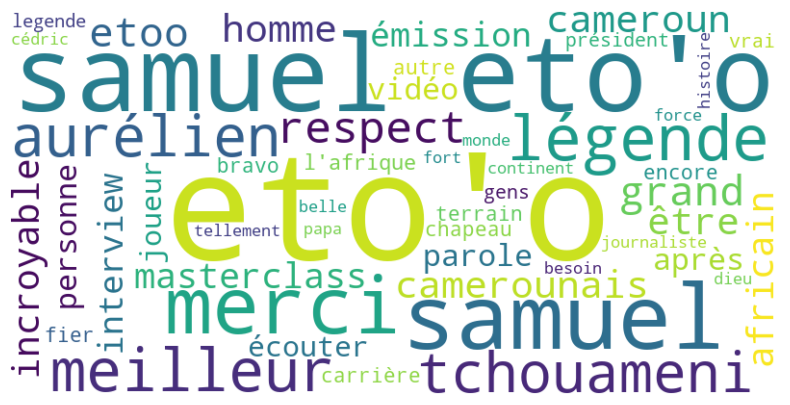

In [52]:
generate_word_cloud(cleaned_comments)

# 2. Topic modelling

In [12]:
from sentence_transformers import SentenceTransformer

In [14]:

sentence_model = SentenceTransformer("dangvantuan/sentence-camembert-base")


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.27k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/463 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [185]:
# Step 6: Extract Main Topics with BERTopic
def extract_topics_bertopic(comments, sentence_model=sentence_model):
    topic_model = BERTopic( n_gram_range=(1, 3), embedding_model=sentence_model,  min_topic_size=5, language="french")
    topics, probs = topic_model.fit_transform(comments)
    return topic_model

In [201]:
topic_model = extract_topics_bertopic(cleaned_comments)

In [202]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,72,-1_etoo_samuel_samuel etoo_merci,"[etoo, samuel, samuel etoo, merci, meilleur, r...","[samuel etoo meilleur, ah oui chapeau continen..."
1,0,27,0_tchouameni_etoo_samuel_samuel etoo,"[tchouameni, etoo, samuel, samuel etoo, respec...",[tas cedric doumbe samuel etoo mm video sais y...
2,1,25,1_samuel_samuel etoo_lgende_etoo,"[samuel, samuel etoo, lgende, etoo, masterclas...","[lgende samuel etoo, samuel etoo, lgende samue..."
3,2,20,2_terrain_vido_parole_etoo,"[terrain, vido, parole, etoo, maignan, aurlien...",[impressionn respect chacun plateau ouf sais r...
4,3,16,3_meilleur_etoo_etoo etoo_etoo meilleur,"[meilleur, etoo, etoo etoo, etoo meilleur, hom...",[chez cte divoire etoo lhomme merci aurlien gr...
5,4,14,4_cameroun_etoo_bni_etoo numro feu,"[cameroun, etoo, bni, etoo numro feu, cameroun...","[cameroun bni, cameroun dimension, cameroun ga..."
6,5,11,5_samuel etoo_samuel_etoo_tellement,"[samuel etoo, samuel, etoo, tellement, legende...",[samuel etoo a tellement choses raconter vrai ...
7,6,9,6_rythme_etoo_masterclass_tjrs force siens,"[rythme, etoo, masterclass, tjrs force siens, ...","[etoo donne tjrs force siens lgende, etoo fort..."
8,7,9,7_coupe_belle_lafrique_comprends maintenant,"[coupe, belle, lafrique, comprends maintenant,...",[pouvais rencontrer etoo pourrai exprimer proj...
9,8,6,8_camerounais_fire dtre_fire dtre camerounais_...,"[camerounais, fire dtre, fire dtre camerounais...","[fire dtre camerounais metez curs continent, f..."


In [197]:
topic_model.visualize_barchart(n_words=10, topics=[1,2,4,5,7,8,9,10 ], height=300, width=300)

In [222]:
topic_model.visualize_barchart(n_words=10, topics=[-1, 1,2,3,4,5,8,9,10 ] )

In [203]:
topic_model.visualize_barchart(n_words=10, topics=[-1, 1,2,3,4,5,7,8,9,10 ] )

In [191]:
topic_model.visualize_barchart(n_words=10, topics=[-1, 1,2,3,4,5,7,8,9,10 ] )

In [184]:
topic_model.visualize_barchart(n_words=10, topics=[-1, 1,2,3,4,5, ] )

In [115]:
topic_model.visualize_barchart(n_words=10, topics=[-1,0, 1,2,3,4,5, ] )

In [107]:
topic_model.visualize_barchart(n_words=10, topics=[-1,0, 1,2,3,4,5,6 ] )

In [189]:
topic_model.visualize_barchart( n_words=10)

In [119]:
topic_model.visualize_heatmap()

# 4. sentiment analysis

In [170]:
def classify_comments(comments):
    classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')
    categories = ['positive', 'negative']
    classified_comments = []
    scores = []
    for comment in tqdm(comments):
        result = classifier(comment, candidate_labels=categories)
        classified_comments.append(result['labels'][0])
        scores.append(result['scores'][0])
    return classified_comments, scores

In [171]:
classified_comments, scores = classify_comments(cleaned_comments)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
100%|██████████| 220/220 [00:58<00:00,  3.79it/s]


In [172]:
df['sentiment'] = classified_comments
df["cleaned_comments"] = cleaned_comments
df["scores"] = scores
df.head()

,0,sentiment,cleaned_comments,scores
0,J'ai adoré cette phrase d'Eto'o '' Ce ne sont ...,negative,ador phrase detoo meilleurs font erreurs parce...,0.852327
1,Mr Eto'o fils samuel vous êtes une vraie Legen...,positive,etoo fils samuel vraie legende forever camerou...,0.890573
2,Aurélien après ta carrière tu feras un bon jou...,positive,aurlien aprs carrire feras bon journaliste mat...,0.816347
3,Impressionné par Aurelien dans son rôle qui ma...,positive,impressionn aurelien rle matrise sens dune mai...,0.996912
4,Sans des sportifs comme Eto'o le sport ne sera...,negative,sportifs etoo sport passion incroyable,0.994974


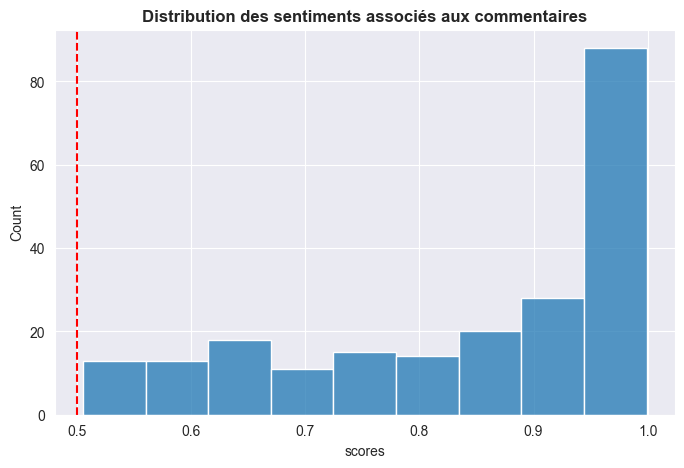

In [223]:
plt.figure(figsize=(8, 5))
plt.rcParams.update({'legend.fontsize': 10})
sns.histplot(df["scores"])
#add a line plot x=1
plt.axvline(x=0.5, color='r', linestyle='--')
plt.title("Distribution des sentiments associés aux commentaires", weight="bold", size=12);

In [212]:
for c in df[ df["cleaned_comments"].str.contains("garoua") ][df.columns[0]].values:
    print(c)

Qui est ici grâce à facebook comme moi .
Bravo SAMUEL GAROUA.
Qui est ici grâce à facebook. 
Est ce que les hiboux voyent le fauteuil de SAMUEL ETO'O. 
TOUS À GAROUA


In [220]:
for c in df[df.columns[0]]:
    u = c.split('Pasteur')
    if len(u) > 1:
        print(c)

False

In [211]:
for c in df[ df[df.columns[0]].str.contains("Garoua") ][df.columns[0]].values:
    print(c)

In [181]:
# select comments with a score greater than 0.5
for c in df[df["scores"] > 0.99][df.columns[0]].values:
    print(c)

Impressionné par Aurelien dans son rôle qui maîtrise à mon sens d’une main de maître… excellente émission
Sans des sportifs comme Eto'o le sport ne serait plus une passion. Il est juste incroyable.
Quand tu vois une vidéo pareille, tu as juste envie de te surpasser pour atteindre tes objectifs.
Masterclass messieurs !!
Fier d'être africain, trop fière d'être Camerounais 🇨🇲
Tchaouameni masterclass, verve, intelligence, un très bon animateur ! Quel classe et charisme.
Eto’o peut paraître arrogant parfois mais il était très fort, une légende africaine respect 🫡 depuis le Mali 🇲🇱 
Tchouameni  TRÈS TRÈS BON calme, posé, bravo !!!
Chapeau bas pour Aurélien qui a vraiment fait une masterclass!
Bravo Aurélien, je te découvre sous un autre angle. Tu gères tes intervenants avec la précision d'un match de football : un excellent timing pour distribuer la parole, tout en affichant un charisme impressionnant. Félicitations !
Vrmt respect à vie à etoo très agréable qd il parle il explique énormément